<a href="https://colab.research.google.com/github/shahiryar/QAOA_Maxcut_for_weighted_graphs/blob/main/Maxcut_weighted_graph_QAOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
# Maxcut for weighted graphs
# This code is a modification of code from https://lucaman99.github.io/new_blog/2020/mar16.html to cater to Finding maxcut for weighted undirected Graphs

In [117]:
import networkx as nx
from matplotlib import pyplot as plt

In [118]:
class G:
  def __init__(self, edges_set): #include weights here
    self.edges_set = edges_set
    self.node_set = []
    # for each edge get the node which are not already in the node_sets
    for i in edges_set:
      if(i.start_node not in self.node_set):
        self.node_set.append(i.start_node)
      if(i.end_node not in self.node_set):
        self.node_set.append(i.end_node)

In [119]:
class E:
  def __init__(self, start_node, end_node, weight):
    self.start_node = start_node
    self.end_node = end_node
    self.weight = weight

In [120]:
#Declaring a graph
#set_edges = [E(0,1,1), E(0,3,1), E(1,2,1), E(1,4,0),E(3,2,1),E(3,4,1),E(2,5,1),E(5,4,1),E(5,6,1),E(4,6,1)]
#graph_ = G(set_edges)


In [121]:
#G = nx.Graph()
#for z in set_edges:
#  G.add_edge(str(z.start_node), str(z.end_node))

In [122]:
#nx.draw(G)

In [124]:
#!pip install cirq
import cirq
import numpy as np
import math
import random
from scipy.optimize import minimize

In [125]:
# Define the list of qubits
#num = len(graph_.node_set)
#depth = 4
#rep = 1000
#qubits = [cirq.GridQubit(0,i) for i in range(0, num)]

In [126]:
# define initialization
  #Preparing equal superpostions on all the qubits (putting Hadamard gate)
def initialization(qubits):
  for i in qubits:
    yield cirq.H.on(i)

In [127]:
#cost unitary
def cost_unitary(qubits, gamma):
  for i in set_edges:
    yield cirq.ZZPowGate(exponent=-1*gamma/math.pi).on(qubits[i.start_node], qubits[i.end_node])

In [128]:
# mixer unitary
def mixer_unitary(qubits, alpha):
  for i in range(0, len(qubits)):
    yield cirq.XPowGate(exponent=-1*alpha/math.pi).on(qubits[i])

In [129]:
#executes the circuit
def create_circuit(params):
  gamma = [params[0], params[2], params[4], params[6]]
  alpha = [params[1], params[3], params[5], params[7]]
  
  circuit = cirq.Circuit()
  circuit.append(initialization(qubits))
  for i in range(0, depth):
    circuit.append(cost_unitary(qubits, gamma[i]))
    circuit.append(mixer_unitary(qubits, alpha[i]))
  circuit.append(cirq.measure(*qubits, key='x'))
  print(circuit)
  simulator = cirq.Simulator()
  results = simulator.run(circuit, repetitions=rep)
  results = str(results)[2:].split(", ")
  new_res = []
  for i in range(0, rep):
    hold = []
    for j in range(0, num):
      hold.append(int(results[j][i]))
    new_res.append(hold)
  return new_res

In [130]:
# defines the cost function
def cost_function(params):
  av = create_circuit(params)
  total_cost = 0
  for i in range(0, len(av)):
    for j in set_edges:
      #the weights are added here
      # The cost would them be:
      # total_cost += 0.5()
      total_cost +=(0.5*(((1-av[i][j.start_node])*(1-av[i][j.end_node]))-1))*j.weight
  totals_cost = float(total_cost)/rep
  print("cost: " + str(total_cost))
  return total_cost

In [135]:
# Define the list of qubits
#A function that takes in a graph and optimizes it
def estimate_maxcut(_graph):
  num = len(_graph.node_set)
  depth = 4
  rep = 1000
  qubits = [cirq.GridQubit(0,i) for i in range(0, num)]


  # Defines the optimization method

  init =[float(random.randint(-314, 314))/float(100) for i in range(0, 8)]
  out = minimize(cost_function, x0=init, method="COBYLA", options={'maxiter':100})
  #print(out)

  optimal_params = out['x']
  f = create_circuit(optimal_params)

  # Creates visualization of the optimal state

  nums = []
  freq = []

  for i in range(0, len(f)):
      number = 0
      for j in range(0, len(f[i])):
          number += 2**(len(f[i])-j-1)*f[i][j]
      if (number in nums):
          freq[nums.index(number)] = freq[nums.index(number)] + 1
      else:
          nums.append(number)
          freq.append(1)

  freq = [s/sum(freq) for s in freq]

  print(nums)
  print(freq)

  x = range(0, 2**num)
  y = []
  for i in range(0, len(x)):
    if (i in nums):
      y.append(freq[nums.index(i)])
    else:
      y.append(0)

  plt.bar(x, y)
  plt.show()
  max_freq = max(freq)
  optimal_freqs_index = [f for f,  x in enumerate(freq) if x == max_freq]
  optimal_sols = []
  for i in optimal_freqs_index:
    optimal_sols.append(nums[i])
  fmt = "0"+str(num)+"b"
  for s in optimal_sols:
    print("|"+format(s, fmt)+">")

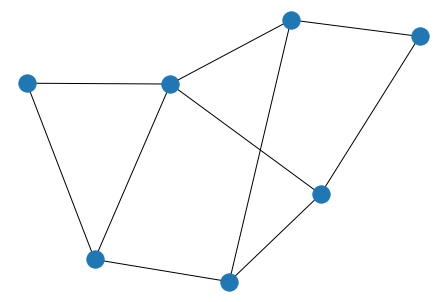

In [136]:
#Declaring a graph
set_edges = [E(0,1,1), E(0,3,1), E(1,2,1), E(1,4,0),E(3,2,1),E(3,4,1),E(2,5,1),E(5,4,1),E(5,6,1),E(4,6,1)]
graph_ = G(set_edges)
g = nx.Graph()
for z in set_edges:
  g.add_edge(str(z.start_node), str(z.end_node))

nx.draw(g)

                             ┌──────────────────────┐   ┌──────────────────────┐   ┌──────────────────────┐                 ┌───────────────────┐   ┌──────────────────┐   ┌───────────────┐   ┌───────────────┐                         ┌────────────────┐   ┌───────────────┐   ┌───────────────┐   ┌──────────────┐                           ┌────────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌──────────────────┐                                          ┌──────────────────┐
(0, 0): ───H───ZZ─────────────ZZ─────────────────────────X^-0.14──────────────────────────────────────────────ZZ─────────────ZZ──────────────────────X^0.602──────────────────────────────────────────────────────────────────ZZ──────────ZZ───────────────────X^0.78───────────────────────────────────────────────────────────────ZZ────────────ZZ───────────────────────X^(-7/8)─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────M('x')───
   

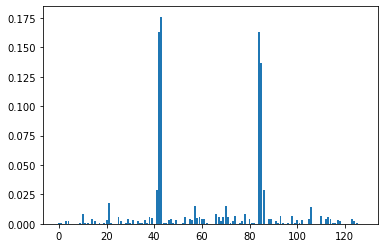

|0101011>


In [137]:
estimate_maxcut(graph_)